# Minfi - normalização 

In [1]:
library(minfi)


library(preprocessCore)
library(stringi)
library(magrittr)
library(data.table)
library(svd)
library(purrr)



Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

BiocManager::install("preprocessCore", 
                     configure.args = c(preprocessCore = "--disable-threading"), 
                     force= TRUE, update=TRUE, type = "source")

In [2]:
setwd("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/")

dataDirectory <-getwd()

In [3]:
sheet <- read.csv("phenotype_file_GSE191276_minfi.csv")
head(sheet)

,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry,predictedSex,minfiMismatch,mMed,uMed,minfi_failed
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<lgl>
1,GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,NA,UNDEF,Pooled controls,NA,M,TRUE,12.51175,12.13699,FALSE
2,GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian,F,FALSE,12.65620,12.17742,FALSE
3,GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,27.0,M,Case,White,M,FALSE,12.28222,11.41098,FALSE
4,GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian,M,FALSE,11.66445,11.44708,FALSE
5,GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor),F,FALSE,12.14402,11.83012,FALSE
6,GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,21.0,M,Control,Unknown (Anonymous blood donor),M,FALSE,12.26209,12.07648,FALSE


In [4]:
load("./minfiRGset.RData")
load("./raw_beta_ewastools.RData")

In [5]:
# Excluir mismatch
sheet <- sheet[!sheet$minfiMismatch ==TRUE,]
sheet

RGSet <- RGSet[,colnames(RGSet) %in% sheet$Basename]
RGSet

beta <- beta[,colnames(beta) %in% sheet$Basename]
head(beta)

,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry,predictedSex,minfiMismatch,mMed,uMed,minfi_failed
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<lgl>
2,GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian,F,FALSE,12.65620,12.17742,FALSE
3,GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,27.0,M,Case,White,M,FALSE,12.28222,11.41098,FALSE
4,GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian,M,FALSE,11.66445,11.44708,FALSE
5,GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor),F,FALSE,12.14402,11.83012,FALSE
6,GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,21.0,M,Control,Unknown (Anonymous blood donor),M,FALSE,12.26209,12.07648,FALSE
7,GSM5742880,204088150175_R04C01,GSM5742880_204088150175_R04C01,204088150175,R04C01,25.0,M,Control,Unknown (Anonymous blood donor),M,FALSE,12.33929,11.95928,FALSE


class: RGChannelSet 
dim: 1051815 6 
metadata(0):
assays(2): Green Red
rownames(1051815): 1600101 1600111 ... 99810990 99810992
rowData names(0):
colnames(6): GSM5742875_202702240141_R06C01
  GSM5742876_202702240141_R08C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(7): GeoID SampleID ... Sex filenames
Annotation
  array: IlluminaHumanMethylationEPIC
  annotation: ilm10b4.hg19

,GSM5742875_202702240141_R06C01,GSM5742876_202702240141_R08C01,GSM5742877_204088150175_R01C01,GSM5742878_204088150175_R02C01,GSM5742879_204088150175_R03C01,GSM5742880_204088150175_R04C01
rs10796216,0.05295671,0.43387847,0.48942548,0.04088132,0.03280404,0.04261139
rs2468330,0.03153656,0.95263007,0.46610385,0.96892556,0.47843410,0.45913288
rs213028,0.95593458,0.01808988,0.93534545,0.01378530,0.02059269,0.01506978
rs951295,0.04982776,0.52229820,0.03984334,0.03281120,0.52527418,0.04903934
rs877309,0.52196660,0.54205745,0.53979270,0.52057311,0.01353058,0.51499211
rs3936238,0.44850641,0.04507437,0.47592934,0.95853009,0.95092284,0.46175465


In [6]:
ls()

[1] "beta"          "dataDirectory" "RGSet"         "sheet"

In [9]:
#GMRset_norm <- preprocessQuantile(RGSet) %>% getBeta
#GMRset_norm

beta_Qnorm <- preprocessQuantile(RGSet) %>% getBeta

[preprocessQuantile] Mapping to genome.

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
[preprocessQuantile] Fixing outliers.

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
[preprocessQuantile] Quantile normalizing.



In [10]:
#Como comparativos, vamos calcular os demais
beta_funnorm <- preprocessFunnorm(RGSet) %>% getBeta

[preprocessFunnorm] Background and dye bias correction with noob

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
[preprocessFunnorm] Mapping to genome

[preprocessFunnorm] Quantile extraction

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
[preprocessFunnorm] Normalization

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify

In [11]:
beta_SWAN <- preprocessSWAN(RGSet) %>% getBeta

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”


In [12]:
beta_noob <- preprocessNoob(RGSet) %>% getBeta

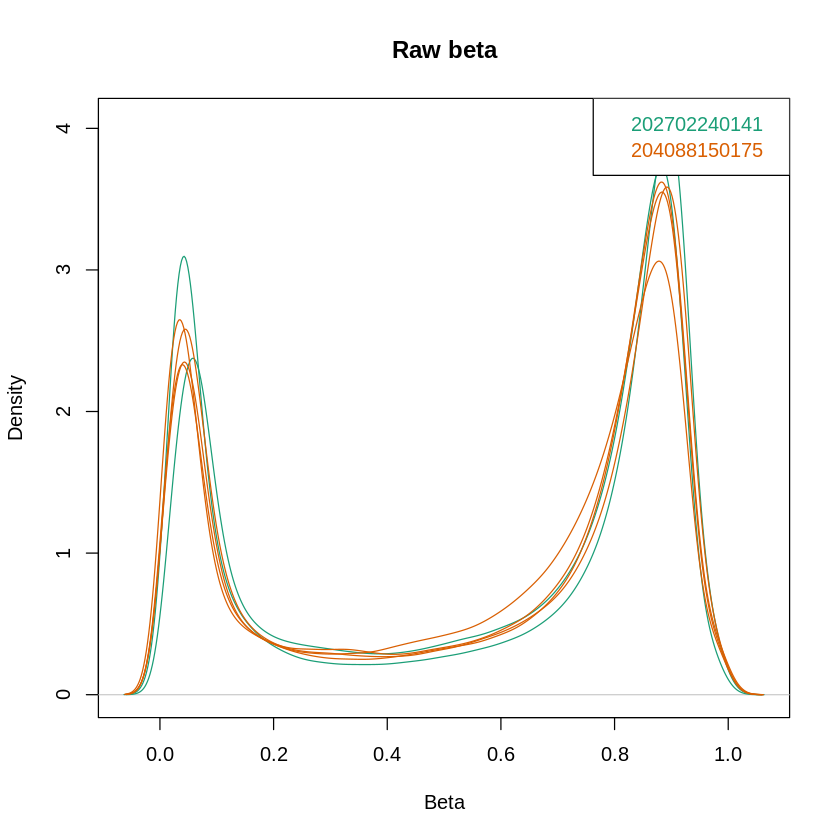

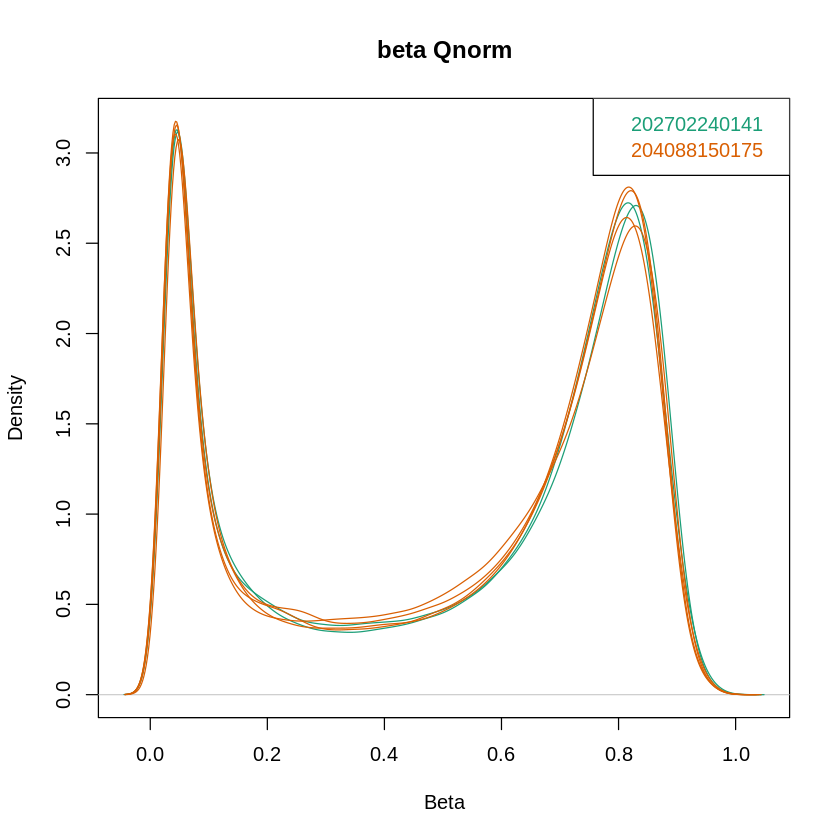

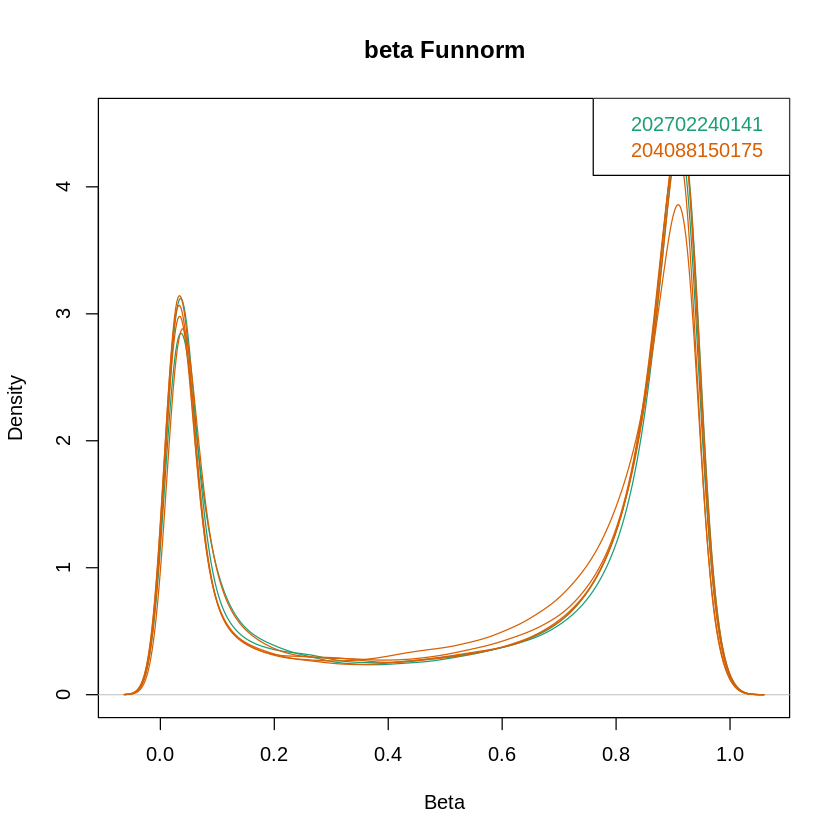

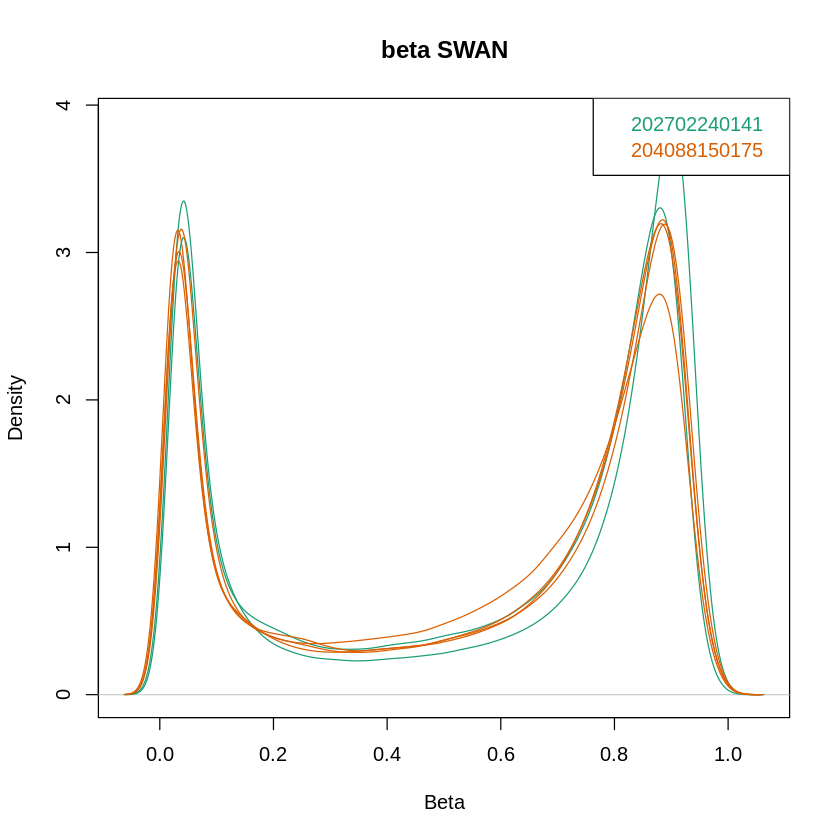

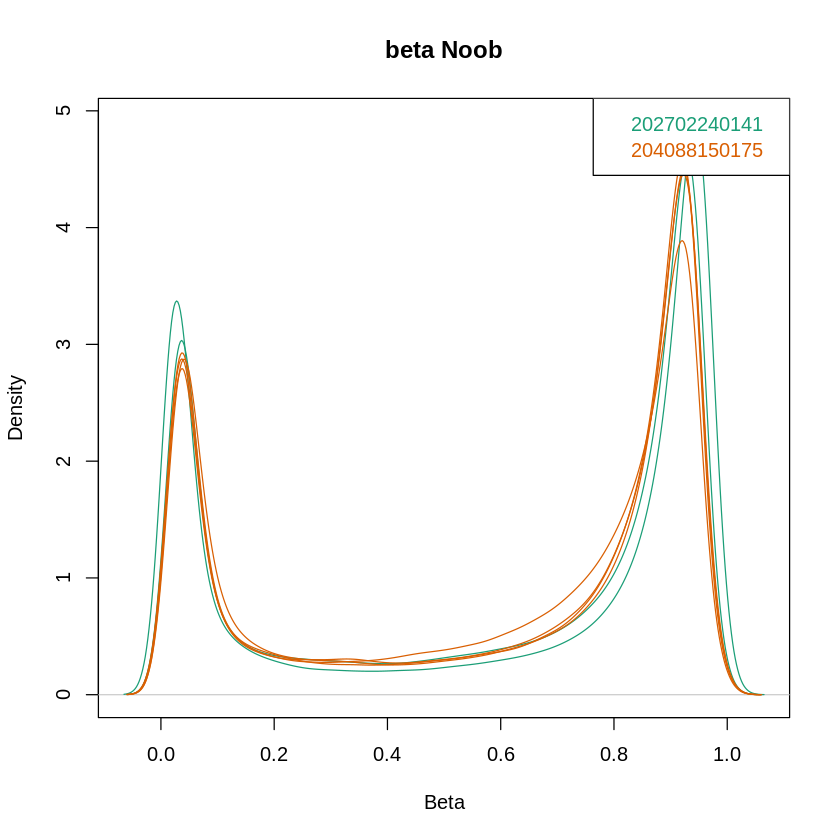

In [21]:
densityPlot(beta, sampGroups = sheet$Sentrix_ID, main = "Raw beta")

densityPlot(beta_Qnorm, sampGroups = sheet$Sentrix_ID, main = "beta Qnorm")

densityPlot(beta_funnorm, sampGroups = sheet$Sentrix_ID, main = "beta Funnorm")

densityPlot(beta_SWAN, sampGroups = sheet$Sentrix_ID, main = "beta SWAN")

densityPlot(beta_noob, sampGroups = sheet$Sentrix_ID, main = "beta Noob")


In [13]:
rm(list=ls())

***

# ENmix 

In [1]:
library(ENmix)

library(stringi)
library(magrittr)
library(data.table)
library(svd)
library(purrr)

Loading required package: parallel

Loading required package: doParallel

Loading required package: foreach

Loading required package: iterators

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiff

In [2]:

setwd("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/")

dataDirectory <-getwd()

In [3]:
sheet <- read.csv("phenotype_file_GSE191276_enmix.csv", row.names = 1)
head(sheet)

,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry,predictedSex,enmixfailed
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,NA,undef,Pooled controls,NA,M,FALSE
2,GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian,F,FALSE
3,GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,27.0,M,Case,White,M,TRUE
4,GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian,M,FALSE
5,GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor),F,FALSE
6,GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,21.0,M,Control,Unknown (Anonymous blood donor),M,FALSE


In [4]:
load("enmix-rgSet.RData")
load("enmix-betaRaw.RData")
load("enmix-qc.RData")

In [6]:
if (file.exists("enmix-mdat-processENmix.RData")){
    load("enmix-mdat-processENmix.RData")
}else{
    mdat <- preprocessENmix(rgSet, bgParaEst="oob", dyeCorr="RELIC", 
                    QCinfo=qc, nCores=3)
    save(mdat,"enmix-mdat-processENmix.RData")
}

In [8]:
rgSet


class: rgDataSet 
dim: 1008987 7 
metadata(3): ictrl Array annotation
assays(3): Red Green NBeads
rownames(1008987): 1600101 1600111 ... 99810978 99810992
rowData names(45): Name Address ... Methyl450_Loci Random_Loci
colnames(7): GSM5742874_202702240141_R05C01
  GSM5742875_202702240141_R06C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(0):
Array:  IlluminaHumanMethylationEPIC 
Annotation:  ilm10b2.hg19 

In [16]:

#Quantile norm
beta_Qnorm1 <- norm.quantile(mdat, method = "quantile1") %>% getB
beta_Qnorm2 <- norm.quantile(mdat, method = "quantile2") %>% getB
beta_Qnorm3 <- norm.quantile(mdat, method = "quantile3") %>% getB

Analysis is running, please wait...! 
Analysis is running, please wait...! 
Analysis is running, please wait...! 


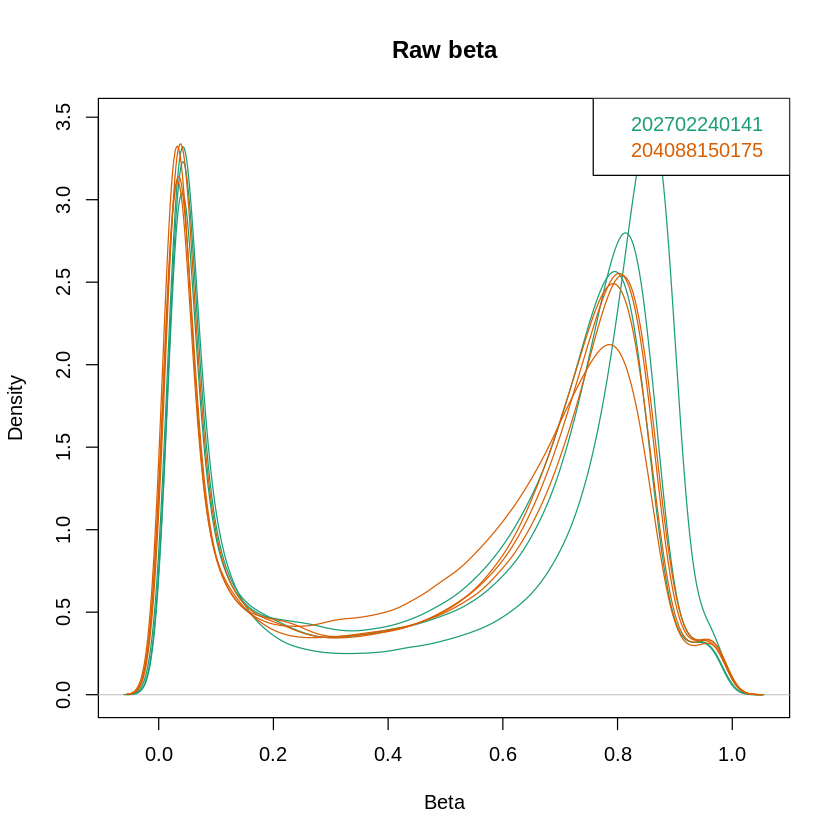

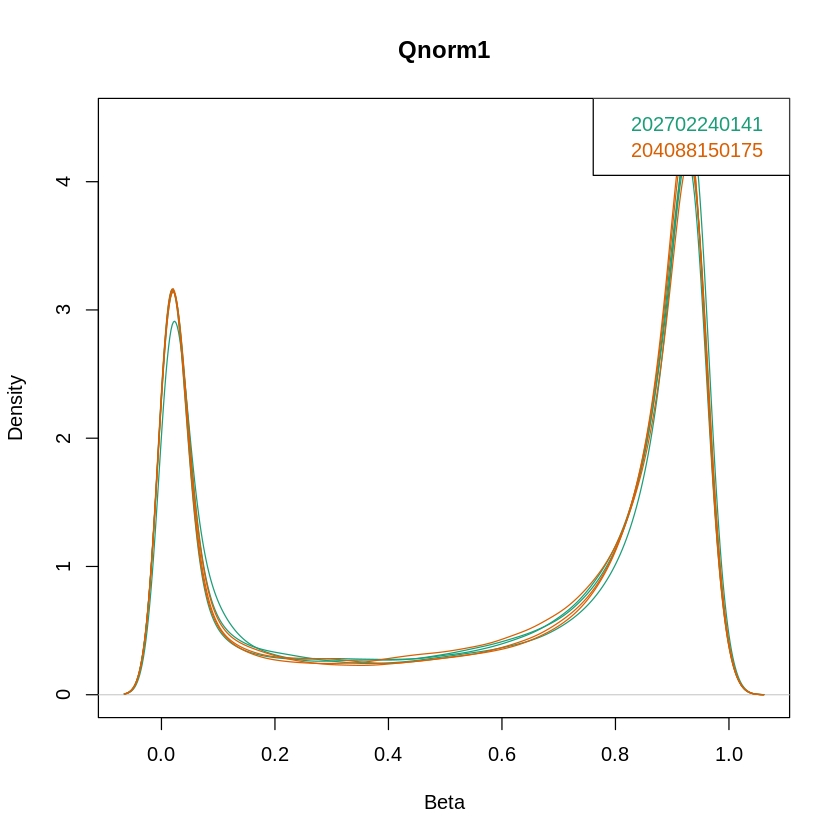

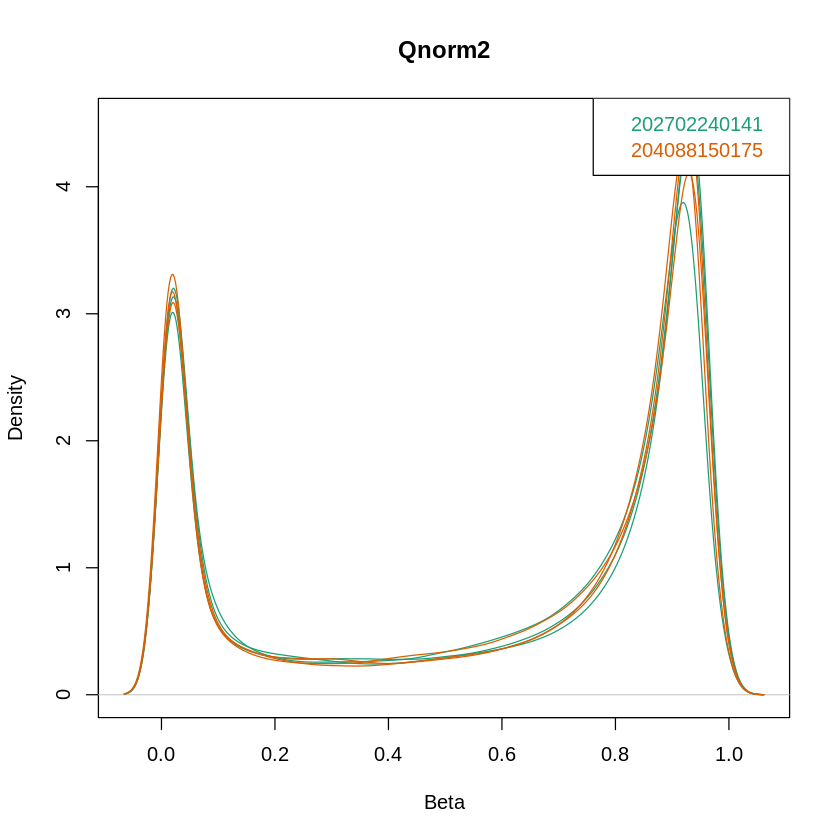

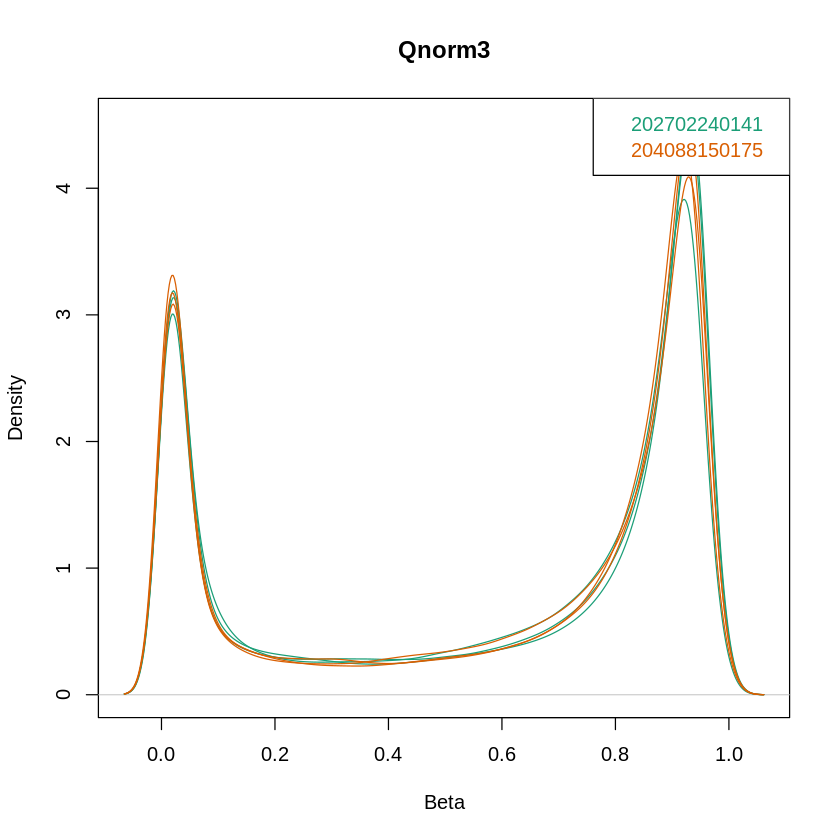

In [23]:
#Beta raw
minfi::densityPlot(beta_raw, sampGroups = sheet$Sentrix_ID, main = "Raw beta")

#Quantile norm
minfi::densityPlot(beta_Qnorm1, sampGroups = sheet$Sentrix_ID, main = "Qnorm1")
minfi::densityPlot(beta_Qnorm2, sampGroups = sheet$Sentrix_ID, main = "Qnorm2")
minfi::densityPlot(beta_Qnorm3, sampGroups = sheet$Sentrix_ID, main = "Qnorm3")


***
### Estimando proporções celulares com ENmix e FlowSortedBlood EPIC

In [9]:
mdat_Qnorm1 <- norm.quantile(mdat, method = "quantile1")
beta_Qnorm1_rcp <- rcp(mdat_Qnorm1, qcscore = qc)

Analysis is running, please wait...! 


In [24]:
save(beta_Qnorm1_rcp, file = "enmix-betaQnorm1_rcp.RData")

In [10]:
BiocManager::install("FlowSorted.Blood.EPIC")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.21), R 4.1.3 (2022-03-10)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'FlowSorted.Blood.EPIC'”
Old packages: 'AnnotationHub', 'askpass', 'backports', 'BH', 'BiocFileCache',
  'BiocManager', 'biomaRt', 'boot', 'brew', 'brio', 'broom', 'bslib', 'cachem',
  'callr', 'cli', 'cluster', 'codetools', 'commonmark', 'crayon',
  'credentials', 'crosstalk', 'crul', 'curl', 'data.table', 'DBI', 'dbplyr',
  'desc', 'digest', 'downlit', 'dplyr', 'DT', 'e1071', 'ENmix', 'evaluate',
  'ExperimentHub', 'fansi', 'farver', 'fastmap', 'filelock', 'fontawesome',
  'foreign', 'fs', 'future', 'future.apply', 'gargle', 'GenomicFeatures',
  'GEOquery', 'gert', 'ggplot2', 'gh', 'glmnet', 'glob

In [11]:
library(FlowSorted.Blood.EPIC)

Loading required package: minfi

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: bumphunter

Loading required package: locfit

locfit 1.5-9.7 	 2023-01-02


Attaching package: ‘locfit’


The following object is masked from ‘package:purrr’:

    none


Loading required package: genefilter


Attaching package: ‘genefilter’


The following objects are masked from ‘package:MatrixGenerics’:

    rowSds, rowVars


The following objects are masked from ‘package:matrixStats’:

    rowSds, rowVars


Loading required package: quadprog

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:Biostrings’:

    collapse


The following object is masked from ‘package:IRanges’:

    collapse


Loading 

In [23]:
load("./enmix-betaQnorm1_rcp.RData")

In [12]:
cellprop <- estimateCellProp(beta_Qnorm1_rcp,refdata="FlowSorted.Blood.EPIC",
                cellTypes=NULL,nonnegative = TRUE,nProbes=50,
                normalize=FALSE,refplot=FALSE)

rgDataSet or methDataSet required for normalization, reset normalize=FALSE

snapshotDate(): 2021-10-19

see ?FlowSorted.Blood.EPIC and browseVignettes('FlowSorted.Blood.EPIC') for documentation

loading from cache

Loading required package: IlluminaHumanMethylationEPICmanifest



In [13]:
cellprop

,Sample_Name,Bcell,CD4T,CD8T,Mono,Neu,NK
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM5742874_202702240141_R05C01,GSM5742874_202702240141_R05C01,0.04936742,0.11661045,0.052848636,0.05083485,0.8221849,0.053918189
GSM5742875_202702240141_R06C01,GSM5742875_202702240141_R06C01,0.04754128,0.03707576,0.026694473,0.01459044,0.9895781,0.035127119
GSM5742877_204088150175_R01C01,GSM5742877_204088150175_R01C01,0.09562074,0.08166139,0.000000000,0.09009617,0.8617053,0.051354008
GSM5742878_204088150175_R02C01,GSM5742878_204088150175_R02C01,0.01493740,0.03709668,0.005534299,0.01889055,1.0380278,0.009286593
GSM5742879_204088150175_R03C01,GSM5742879_204088150175_R03C01,0.07990613,0.07330435,0.110377956,0.08562023,0.6000295,0.219767416
GSM5742880_204088150175_R04C01,GSM5742880_204088150175_R04C01,0.02306845,0.09842478,0.077103694,0.01074029,0.9057353,0.028532447


In [28]:
save(cellprop, file = "enmix-cellprop.RData")

In [14]:
sheet <- merge(x=sheet, y = cellprop, by.x = "Basename", by.y = "Sample_Name")


In [15]:
sheet
write.csv(sheet, file ="phenotype_file_GSE191276_cellprop_enmix.csv", row.names=F)

Basename,GeoID,SampleID,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry,predictedSex,enmixfailed,Bcell,CD4T,CD8T,Mono,Neu,NK
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM5742874_202702240141_R05C01,GSM5742874,202702240141_R05C01,202702240141,R05C01,NA,undef,Pooled controls,NA,M,FALSE,0.04936742,0.11661045,0.052848636,0.05083485,0.8221849,0.053918189
GSM5742875_202702240141_R06C01,GSM5742875,202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian,F,FALSE,0.04754128,0.03707576,0.026694473,0.01459044,0.9895781,0.035127119
GSM5742877_204088150175_R01C01,GSM5742877,204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian,M,FALSE,0.09562074,0.08166139,0.000000000,0.09009617,0.8617053,0.051354008
GSM5742878_204088150175_R02C01,GSM5742878,204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor),F,FALSE,0.01493740,0.03709668,0.005534299,0.01889055,1.0380278,0.009286593
GSM5742879_204088150175_R03C01,GSM5742879,204088150175_R03C01,204088150175,R03C01,21.0,M,Control,Unknown (Anonymous blood donor),M,FALSE,0.07990613,0.07330435,0.110377956,0.08562023,0.6000295,0.219767416
GSM5742880_204088150175_R04C01,GSM5742880,204088150175_R04C01,204088150175,R04C01,25.0,M,Control,Unknown (Anonymous blood donor),M,FALSE,0.02306845,0.09842478,0.077103694,0.01074029,0.9057353,0.028532447


***
## SVA (Surrogate Variable Analysis) - ENmix

In [32]:
sva<-ctrlsva(rgSet)

3  surrogate variables explain  96.75337 % of 
    data variation


In [33]:
sva

,PC1,PC2,PC3
GSM5742874_202702240141_R05C01,-23200.4678,432.6245,2186.150
GSM5742875_202702240141_R06C01,-36099.9542,-1503.7245,4109.675
GSM5742876_202702240141_R08C01,491.0365,24742.8444,-4301.525
GSM5742877_204088150175_R01C01,33738.9329,6108.7401,6426.920
GSM5742878_204088150175_R02C01,13815.8590,-11021.9837,3778.441
GSM5742879_204088150175_R03C01,7868.8261,-10419.0494,-5920.879
GSM5742880_204088150175_R04C01,3385.7675,-8339.4514,-6278.782


In [35]:
sheet <- merge(x=sheet, y = sva, by.x = "Basename", by.y = "row.names")

In [38]:
sheet
write.csv(sheet, file = "phenotype_file_GSE191276_cellprop_sva_enmix.csv",row.names=F)

Basename,GeoID,SampleID,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry,predictedSex,enmixfailed,Bcell,CD4T,CD8T,Mono,Neu,NK,PC1,PC2,PC3
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM5742874_202702240141_R05C01,GSM5742874,202702240141_R05C01,202702240141,R05C01,NA,undef,Pooled controls,NA,M,FALSE,0.04936742,0.11661045,0.052848636,0.05083485,0.8221849,0.053918189,-23200.468,432.6245,2186.150
GSM5742875_202702240141_R06C01,GSM5742875,202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian,F,FALSE,0.04754128,0.03707576,0.026694473,0.01459044,0.9895781,0.035127119,-36099.954,-1503.7245,4109.675
GSM5742877_204088150175_R01C01,GSM5742877,204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian,M,FALSE,0.09562074,0.08166139,0.000000000,0.09009617,0.8617053,0.051354008,33738.933,6108.7401,6426.920
GSM5742878_204088150175_R02C01,GSM5742878,204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor),F,FALSE,0.01493740,0.03709668,0.005534299,0.01889055,1.0380278,0.009286593,13815.859,-11021.9837,3778.441
GSM5742879_204088150175_R03C01,GSM5742879,204088150175_R03C01,204088150175,R03C01,21.0,M,Control,Unknown (Anonymous blood donor),M,FALSE,0.07990613,0.07330435,0.110377956,0.08562023,0.6000295,0.219767416,7868.826,-10419.0494,-5920.879
GSM5742880_204088150175_R04C01,GSM5742880,204088150175_R04C01,204088150175,R04C01,25.0,M,Control,Unknown (Anonymous blood donor),M,FALSE,0.02306845,0.09842478,0.077103694,0.01074029,0.9057353,0.028532447,3385.767,-8339.4514,-6278.782


***
## EWAS - CpG.assoc

In [40]:
sheet <- read.csv("phenotype_file_GSE191276_cellprop_sva_enmix.csv")
sheet2 <- sheet[which(!sheet$Basename == "GSM5742874_202702240141_R05C01"),]	
sheet2 


,Basename,GeoID,SampleID,Sentrix_ID,Sentrix_Position,Age,Sex,case.control,ancestry,predictedSex,enmixfailed,Bcell,CD4T,CD8T,Mono,Neu,NK,PC1,PC2,PC3
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,GSM5742875_202702240141_R06C01,GSM5742875,202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian,F,FALSE,0.04754128,0.03707576,0.026694473,0.01459044,0.9895781,0.035127119,-36099.954,-1503.724,4109.675
3,GSM5742877_204088150175_R01C01,GSM5742877,204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian,M,FALSE,0.09562074,0.08166139,0.000000000,0.09009617,0.8617053,0.051354008,33738.933,6108.740,6426.920
4,GSM5742878_204088150175_R02C01,GSM5742878,204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor),F,FALSE,0.01493740,0.03709668,0.005534299,0.01889055,1.0380278,0.009286593,13815.859,-11021.984,3778.441
5,GSM5742879_204088150175_R03C01,GSM5742879,204088150175_R03C01,204088150175,R03C01,21.0,M,Control,Unknown (Anonymous blood donor),M,FALSE,0.07990613,0.07330435,0.110377956,0.08562023,0.6000295,0.219767416,7868.826,-10419.049,-5920.879
6,GSM5742880_204088150175_R04C01,GSM5742880,204088150175_R04C01,204088150175,R04C01,25.0,M,Control,Unknown (Anonymous blood donor),M,FALSE,0.02306845,0.09842478,0.077103694,0.01074029,0.9057353,0.028532447,3385.767,-8339.451,-6278.782


In [44]:
library(CpGassoc)


Attaching package: ‘CpGassoc’


The following object is masked from ‘package:BiocGenerics’:

    design




In [47]:
test <- cpg.assoc(beta_Qnorm1_rcp, sheet$case.control, covar = c("Age","Sex","Bcell","CD4T","CD8T",
                                                                "Mono",	"Neu","NKPC1","PC2","PC3"),
                logit.transform = T,
                large.data=TRUE, 
                data = )
  assoc <- test$results
  eff <- test$coefficients
  results <- cbind(assoc, eff)

ERROR: Error in cpg.length(indep, beta.col, covariates, chip.id): Number of subjects per variable do not match up, check your variables

